In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
iris = pd.read_csv('/Users/jennyskytta/Desktop/iris.csv', sep = '\t')
iris.sample(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
52,6.9,3.1,4.9,1.5,versicolor
34,4.9,3.1,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa


Plots are good to view the data - this shows only 3 groupings of the 4 data types

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

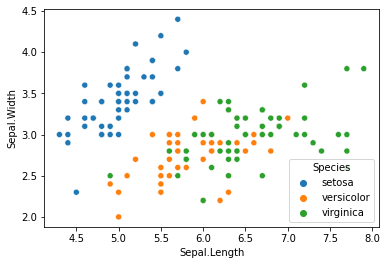

In [8]:
sns.scatterplot(x="Sepal.Length", y="Sepal.Width", hue="Species", data=iris)

In [26]:
from sklearn.cluster import KMeans

# we need to prepare the data
# you wouldn't do training / testing but you can do some stability testing 

X = iris[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
m = KMeans(n_clusters=3)
_ = m.fit(X)   # note that we are fitting on X because y doesn't exist here

In [27]:
kmhat = m.predict(X)
kmhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

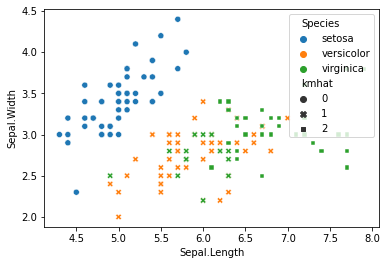

In [28]:
iris["kmhat"] = kmhat
scatty = sns.scatterplot(x="Sepal.Length", y="Sepal.Width", 
                    hue="Species", style="kmhat",
                    data=iris)

In [29]:
pd.crosstab(iris.Species, iris.kmhat)

kmhat,0,1,2
Species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [30]:
m.inertia_   # overall loss  variation within the clusters 

78.85144142614601

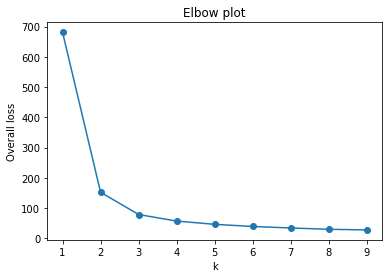

In [34]:
ks = range(1, 10)
losses = []
for k in ks:
    m = KMeans(k)
    _ = m.fit(X)
    losses.append(m.inertia_)
_ = plt.plot(ks, losses, marker="o")
plt.xlabel("k")
_ = plt.ylabel("Overall loss")
_ = plt.title("Elbow plot")  # best 

In [39]:
from sklearn.cluster import AgglomerativeClustering

# this doesn't NEED a numbered cluster BUT its hard to predict with out a number
m = AgglomerativeClustering(3)
achat = m.fit_predict(X)  # AC hat 

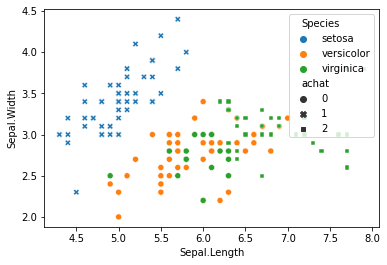

In [41]:
iris["achat"] = achat
_ = sns.scatterplot(x="Sepal.Length", y="Sepal.Width", 
                    hue="Species", style="achat",
                    data=iris)

In [43]:
pd.crosstab(iris.Species, iris.achat)  # we see 2 flowers that moved clusters

achat,0,1,2
Species,,,
setosa,0,50,0
versicolor,49,0,1
virginica,15,0,35


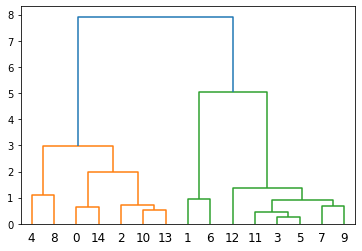

In [49]:
import scipy.cluster.hierarchy as sch

_ = sch.dendrogram((sch.linkage(X.sample(15), method="ward")))  # sample of 15 for our 3 clusters 

- look up how to predict with cluster data
- look up how to interpet dendrogram 

We interpret using our crosstab and we can say that it corresponds to "???" in this case to Species
We can calculate average length for different clusters 

In [51]:
iris.groupby("kmhat")[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
kmhat,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


What can we tell about these clusters?  

- Cluster 0 has small petals 
- Cluster 1 has middle sized petals and large sepals 
- Cluster 2 has largest petals and large sepals